# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#query url
query_url = f'{url}appid={weather_api_key}&q='


city_names =[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

count = 1

for city in cities:
    try:
        response = requests.get(query_url + city +'&units=imperial').json()

        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City #{count}: {response['name']}")
        count = count + 1

    except:
        print(f'#{count}: {city} not found.\n')
        count = count + 1



City #1: Vao
City #2: Mahébourg
City #3: Ostrovnoy
City #4: Albany
City #5: Port Alfred
City #6: Ushuaia
City #7: Tuxpan
#8: samusu not found.

City #9: San Juan del Sur
City #10: Wonthaggi
City #11: Port Elizabeth
City #12: Hermanus
City #13: Bethel
City #14: Atuona
City #15: Poum
City #16: Constitución
City #17: Nikolskoye
City #18: Rikitea
City #19: Laguna
City #20: George Town
City #21: Port-Gentil
City #22: Punta Arenas
City #23: Yulara
City #24: Busselton
City #25: Khatanga
City #26: Chute-aux-Outardes
#27: tumannyy not found.

City #28: Arraial do Cabo
#29: grand river south east not found.

#30: attawapiskat not found.

City #31: Avarua
#32: taolanaro not found.

City #33: Faya
City #34: Katsuura
City #35: Manuk Mangkaw
#36: nguiu not found.

City #37: Jardim
City #38: Tual
#39: alotau not found.

City #40: Tromsø
City #41: Hurghada
City #42: Bredasdorp
City #43: Mataura
#44: mocambique not found.

City #45: Durango
City #46: Klaksvík
#47: maymanak not found.

City #48: Puerto 

City #389: Yichang
City #390: Ames
City #391: Rome
City #392: Chui
City #393: Morón
City #394: Kryvyi Rih
City #395: Quelimane
City #396: Bereket
City #397: Tucumã
City #398: Manokwari
City #399: Saint Paul Harbor
City #400: Ndélé
City #401: Khorixas
City #402: Mions
City #403: Yenagoa
City #404: Luwuk
City #405: Fairbanks
City #406: Boffa
City #407: Flin Flon
City #408: Toora-Khem
City #409: Saint George
City #410: Daokou
City #411: Tsarychanka
City #412: Coquimbo
City #413: Cham
City #414: Pudozh
City #415: Parga
City #416: Saint Anthony
City #417: Harūr
City #418: Inuvik
City #419: Shalinskoye
City #420: Eyl
City #421: Russell
City #422: Luangwa
City #423: Sijunjung
#424: sentyabrskiy not found.

City #425: Okhotsk
City #426: Tilichiki
City #427: Bafra
City #428: Veisiejai
City #429: Fare
City #430: Hope
City #431: Broome
City #432: Mbaïki
#433: palabuhanratu not found.

City #434: Popondetta
City #435: Celestún
City #436: Danielskuil
#437: utiroa not found.

City #438: Amurzet
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    'City': city_names,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,66.74,63,0,13.96,NC,1631903887
1,Mahébourg,-20.4081,57.7000,72.25,94,40,6.91,MU,1631903888
2,Ostrovnoy,68.0531,39.5131,41.99,73,100,5.86,RU,1631903889
3,Albany,42.6001,-73.9662,76.08,79,78,6.91,US,1631903865
4,Port Alfred,-33.5906,26.8910,58.12,58,71,4.70,ZA,1631903890


In [6]:
def firstq(ser):
    return ser.quantile(.25)

def secondq(ser):
    return ser.quantile(.75)

summary_df = weather_df.agg(['count','mean','std','min',firstq, 'median', secondq, 'max'])[['Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# summary_df = summary_df.rename(index={"firstq": "25%", "median": "50%", "secondq": "75%"})

summary_df


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
min,-54.800000,-175.200000,13.260000,8.000000,0.000000,0.000000,1.631903e+09
max,78.218600,178.416700,103.010000,100.000000,100.000000,28.770000,1.631904e+09
mean,20.762654,19.613684,66.932228,71.122807,53.222807,7.384877,1.631904e+09
std,32.732193,88.757020,17.293514,21.449389,40.359995,5.048697,1.194294e+02
firstq,-5.467875,-59.300075,52.667500,62.000000,9.000000,3.515000,1.631904e+09
median,26.816400,23.619750,71.475000,76.000000,56.500000,6.610000,1.631904e+09
secondq,46.846425,96.123875,79.022500,87.000000,98.000000,9.995000,1.631904e+09


In [7]:
weather_df.to_csv('weatherdata.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
len(weather_df)

570

In [9]:
#  Get the indices of cities that have humidity over 100%.
index_series = weather_df[weather_df['Humidity'] > 100].index
index_series

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(index_series)
len(weather_df)

570

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

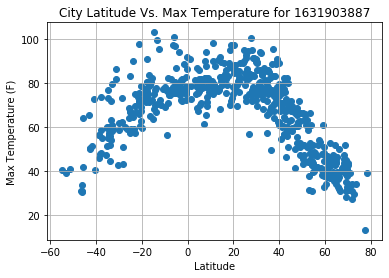

In [11]:
x = weather_df['Lat']

y = weather_df['Max Temp']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude Vs. Max Temperature for {date}")

plt.savefig('Latitude_vs_Temperature_Plot.png')
plt.show()


## Latitude vs. Humidity Plot

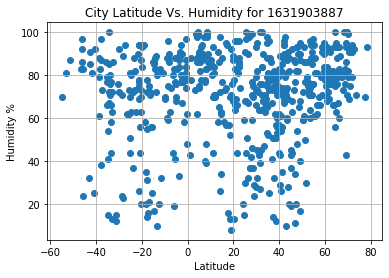

In [12]:
x = weather_df['Lat']

y = weather_df['Humidity']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude Vs. Humidity for {date}")

plt.savefig('Latitude_vs_Humidity_Plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

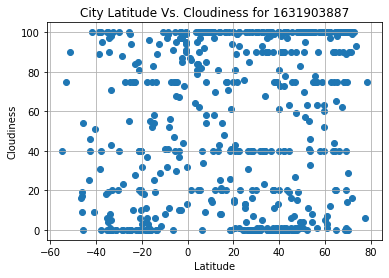

In [13]:
x = weather_df['Lat']

y = weather_df['Cloudiness']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude Vs. Cloudiness for {date}")

plt.savefig('Latitude_vs_Cloudiness_Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

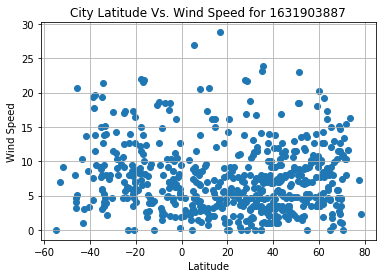

In [14]:
x = weather_df['Lat']

y = weather_df['Wind Speed']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude Vs. Wind Speed for {date}")

plt.savefig('Latitude_vs_WindSpeed_Plot.png')
plt.show()

## Linear Regression

In [15]:
# northern hemisphere latitudes are positive
north_df = weather_df[weather_df['Lat'] >= 0]

south_df = weather_df[weather_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8195201705489961


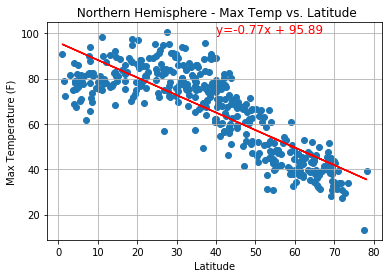

In [19]:
x = north_df['Lat']
y = north_df['Max Temp']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Northern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(40,100),fontsize=12,color="red")

plt.savefig('NorthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7384112585559731


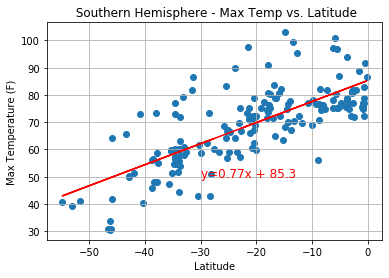

In [22]:
x = south_df['Lat']
y = south_df['Max Temp']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Southern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,50),fontsize=12,color="red")

plt.savefig('SouthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08849381880665017


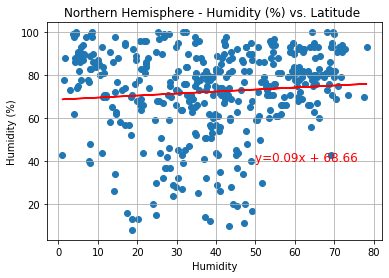

In [23]:
x = north_df['Lat']
y = north_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(50,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04078282240599172


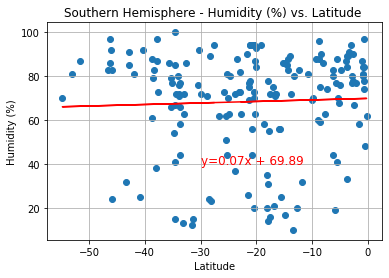

In [24]:
x = south_df['Lat']
y = south_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05126756865733889


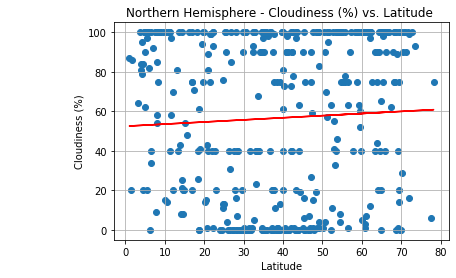

In [25]:
x = north_df['Lat']
y = north_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22380028579648953


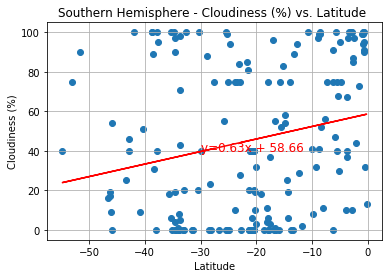

In [26]:
x = south_df['Lat']
y = south_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11338070226156513


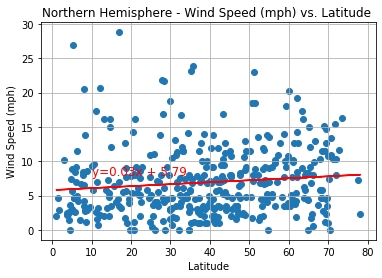

In [27]:
x = north_df['Lat']
y = north_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('NorthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08349385326102417


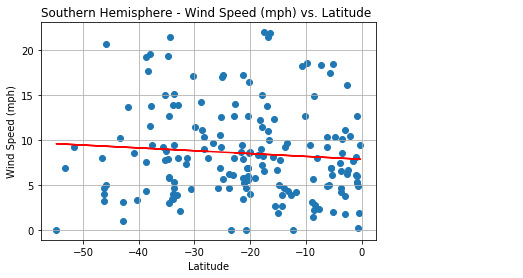

In [28]:
x = south_df['Lat']
y = south_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('SouthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()